This notebook contains the code for our advanced data mining project on California House Pricing. We will first understand the data. We will preprocess the data and do some exploratory data analytics with visualization. Then we shall continue to feature extraction and after we are done with these processes apply some machine learning models and see our results.

Step 1 || Data import and preprocessing

Importing dependencies

In [1]:
import pandas as pd
import os

In [2]:
raw_data = pd.read_csv(r'C:\Users\sriji\CS5990_AdvData\Project\California_Housing_data\housing.csv')
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We see the attributes in the given data and we are going to predict the median house value depending on the features. We though need to check the data for discrepancies, null values, engineer a solution for the null values and do a few visualization to aid in our data preprocessing , so let's get into that

Importing dependencies for data preprocessing

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Checking rows and columns

In [4]:
rows = raw_data.shape[0]
columns = raw_data.shape[1]

print("Rows:",rows)
print("Columns:",columns)

Rows: 20640
Columns: 10


Let us see the datatypes for our columns

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observations:

1. We see that count of total bedrooms do not match up with the rest of the data so there must be some missing values in that field.
2. We now have median house age information, total rooms, population and median income.

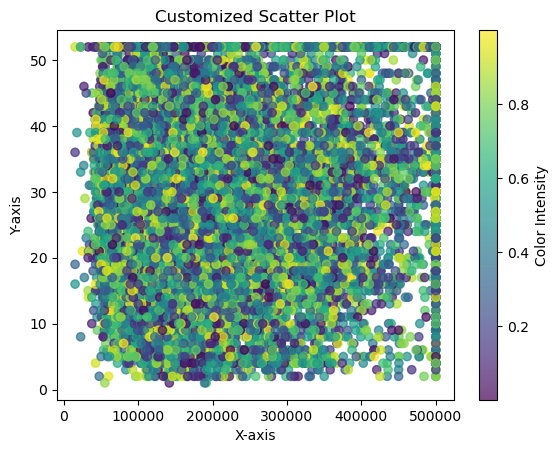

In [8]:
%matplotlib inline
import math

colors = np.random.rand(20640)


plt.scatter(raw_data.median_house_value, raw_data.housing_median_age, c = colors , alpha=0.7, cmap='viridis')
 
# Add title and axis labels
plt.title("Customized Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
# Display color intensity scale
plt.colorbar(label='Color Intensity')
 
# Show the plot
plt.show()

Dealing with null values in bedrooms

The bedroom null values comprise only 2% of the original data set and hence we have decided to drop the rows will no bedroom count

In [9]:
raw_data.dropna(inplace = True)

In [10]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Now our data has 20433 rows and there is no null values in these rows.

We have to convert ocean_proximity to numerical values in order to proceed with our data.

In [12]:
raw_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

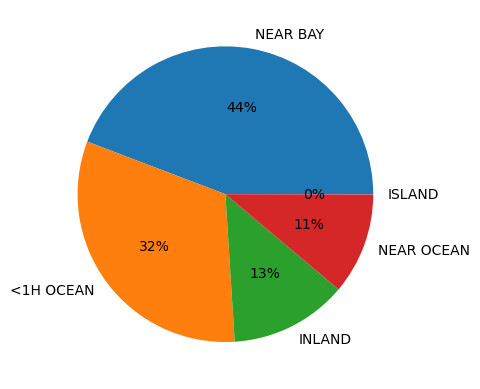

In [15]:
plt.pie(raw_data['ocean_proximity'].value_counts(normalize=True), autopct='%1.0f%%',labels=raw_data['ocean_proximity'].unique() );

In [16]:
pd.get_dummies(raw_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [17]:
transformed_data = raw_data.join(pd.get_dummies(raw_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis = 1)

In [18]:
transformed_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

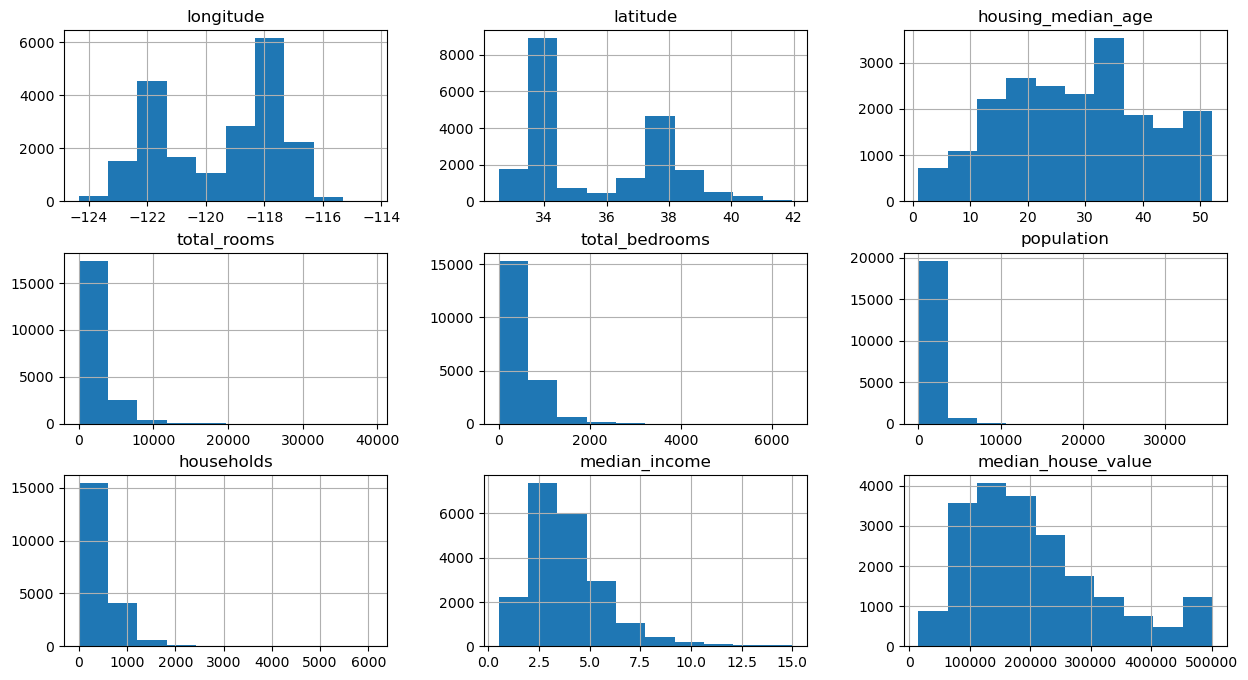

In [15]:
raw_data.hist(figsize = (15,8))

<Axes: >

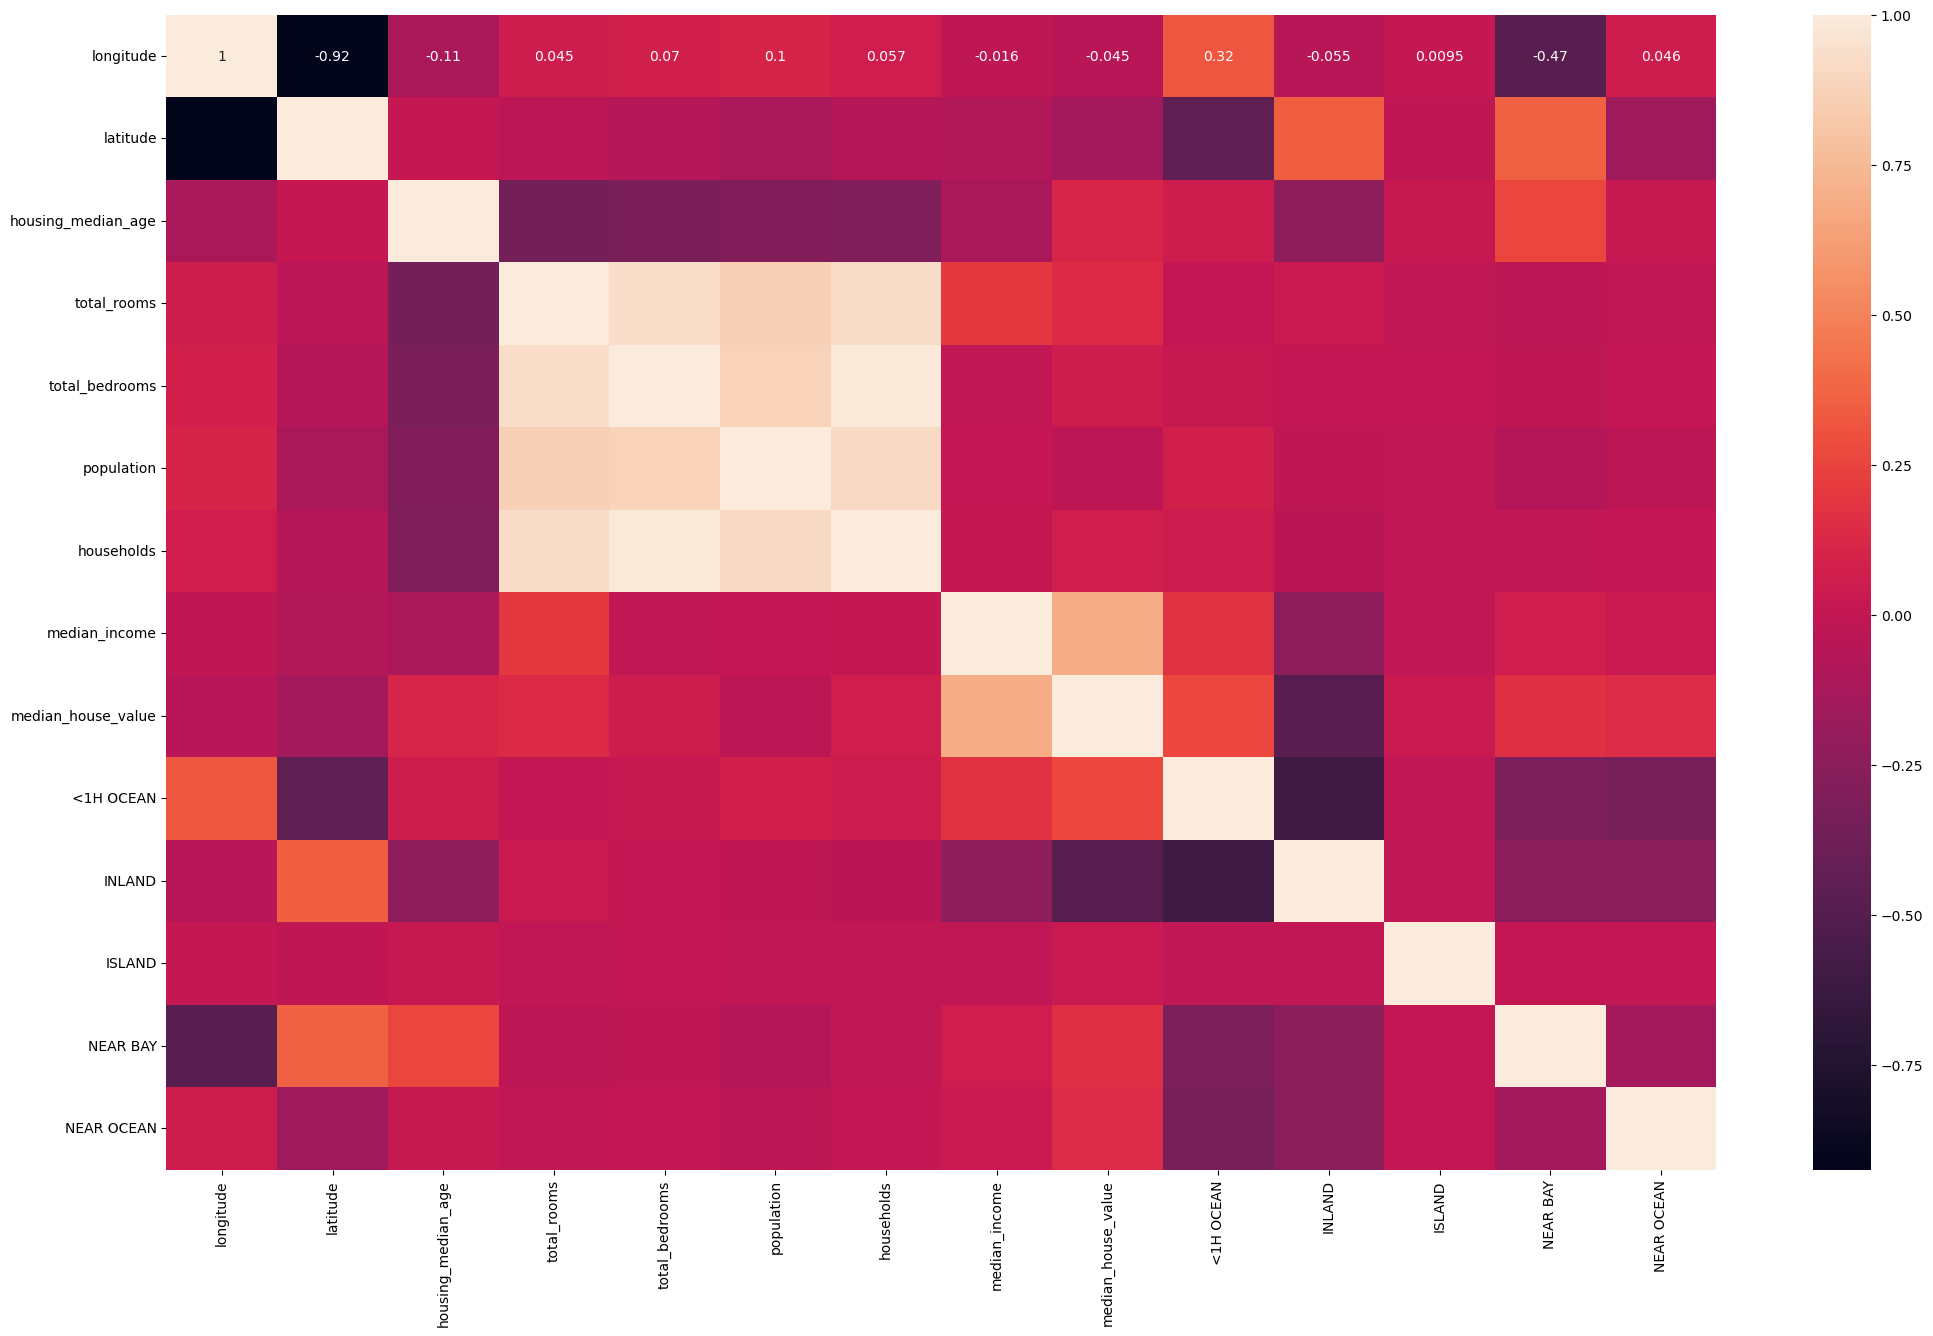

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,15))
sns.heatmap(transformed_data.corr(),annot=True,xticklabels=True, yticklabels=True)

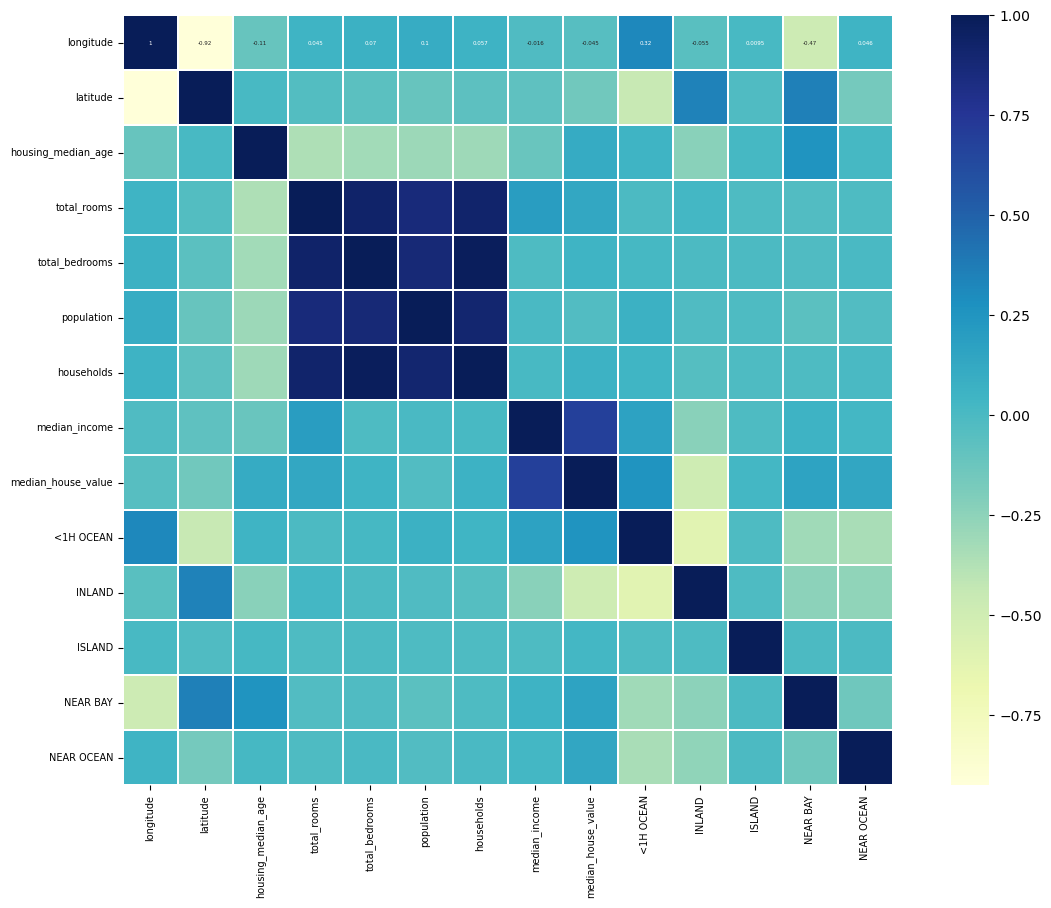

In [19]:
plt.figure(figsize=(15,10))

g=sns.heatmap(transformed_data.corr(), vmin=transformed_data.corr().values.min(), 
              vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, 
              annot=True, annot_kws={"fontsize":4},
              xticklabels=1, yticklabels=1) 

g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 7)
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

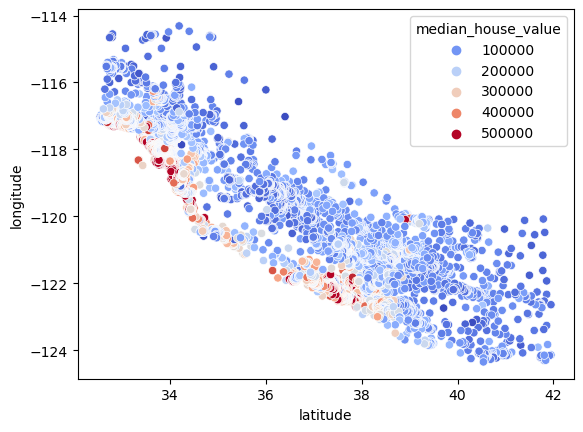

In [18]:
#further testing the median house value
sns.scatterplot(x = 'latitude',y = 'longitude',data = transformed_data,hue = 'median_house_value',palette = 'coolwarm')

<Axes: xlabel='housing_median_age'>

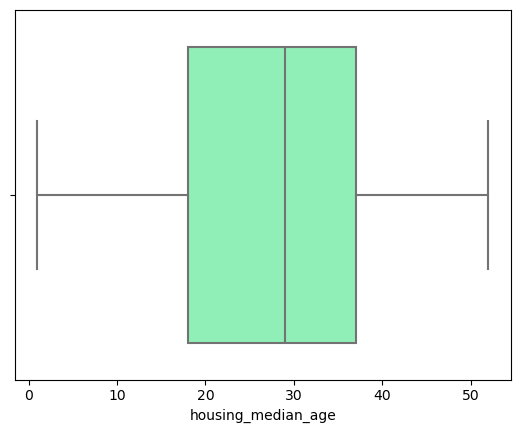

In [20]:
sns.boxplot(data = transformed_data, x = 'housing_median_age', palette = 'rainbow') #gives us the mean age

C:\Users\sriji\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


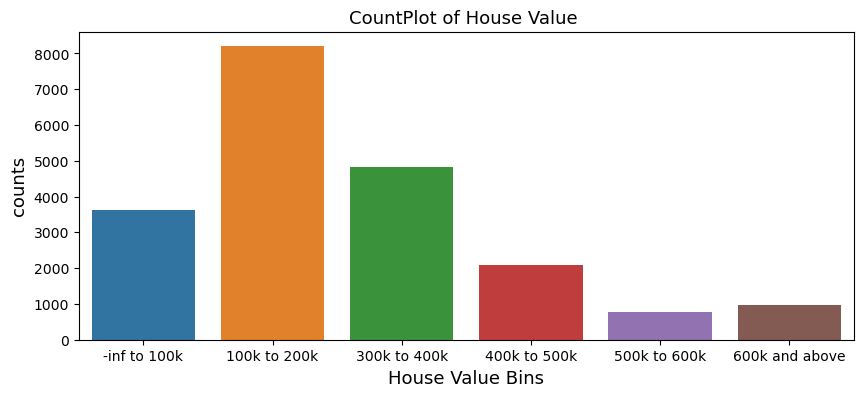

In [22]:
#distribution of house value

meadian_house_cv = pd.cut(x=transformed_data['median_house_value'],
                          bins=(-np.inf, 100000,200000,300000,400000,500000,np.inf),
                          labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k and above'))
## countpLot for the above chunks 
plt.figure(figsize=(10,4)) 
sns.countplot(x=meadian_house_cv) 
plt.title('CountPlot of House Value ', fontsize=13, c='k') 
plt.xlabel('House Value Bins', fontsize=13, c='k') 
plt.ylabel('counts', fontsize=13,c='k') 
plt.show() 

<Axes: xlabel='median_income'>

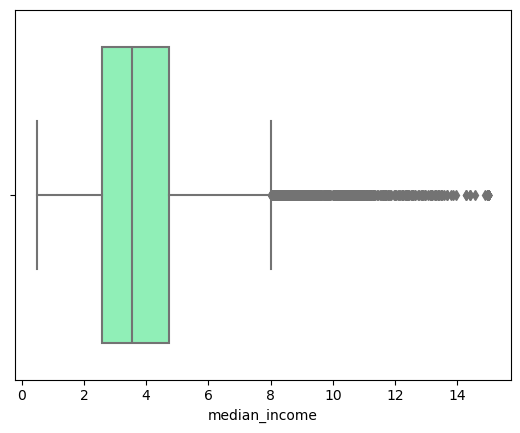

In [33]:
sns.boxplot(data = transformed_data, x = 'median_income', hue = 'housing_median_age' ,palette = 'rainbow') #outlier detection

C:\Users\sriji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


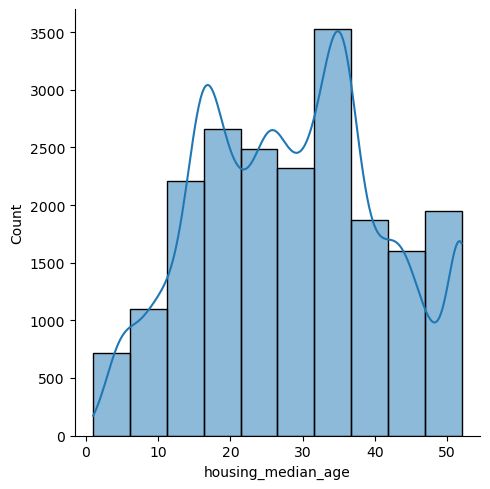

In [51]:
sns.displot(data = transformed_data, x = 'housing_median_age',kde = True, bins=10)

C:\Users\sriji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


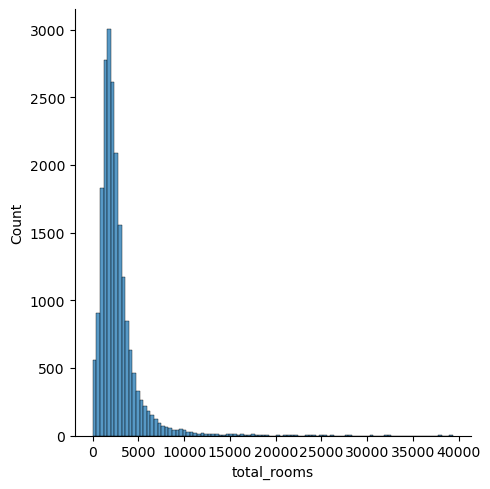

In [49]:
sns.displot(data = transformed_data, x = 'total_rooms',kde = False, bins=100)

C:\Users\sriji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


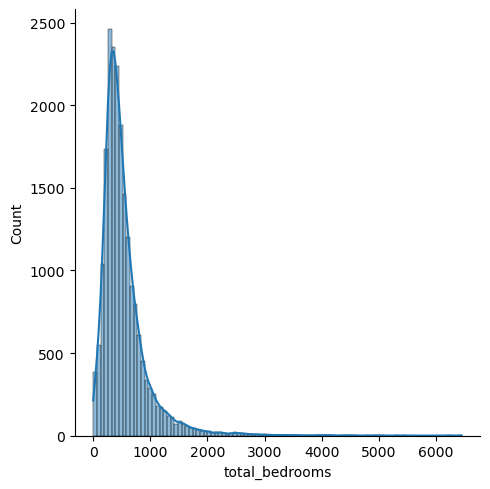

In [50]:
sns.displot(data = transformed_data, x = 'total_bedrooms',kde = True, bins=100)

In [52]:
#the above visualizations give us a sneak peek into the data distributions

In [53]:
transformed_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


Approach 1:

Simple Linear Regression. We shall divide the data into train and test. We are predicting median house value based on the features

In [55]:
X = transformed_data.drop(['median_house_value'],axis = 1)

In [56]:
y = transformed_data['median_house_value']

In [57]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [58]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [59]:
#importing dependencies

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [65]:
lin_model = LinearRegression()

In [68]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [69]:
lin_model.predict(X_train)

array([252358.68680087, 131077.41710872, 185649.69396132, ...,
       214345.49423819, 253488.95520662, 253008.71037236])

In [71]:
lin_model.score(X_train,y_train)

0.6456482397646104

In [78]:
print("Accuracy of the linear regression model is: ",lin_model.score(X_test,y_test)*100 ,'%')

Accuracy of the linear regression model is:  64.88402154431999 %


In [73]:
#I will make a few changes in feature engineering for this